# AIDM7370 AI Theories and Applications
# Exercise 2

In [3]:
# Install NetworkX, Matplotlib, Pandas, Numpy using pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install networkx
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy

Create an undirected graph.

Nodes of graph: 
['S', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
Edges of graph: 
[('S', 'A'), ('S', 'D'), ('A', 'D'), ('A', 'B'), ('B', 'C'), ('B', 'E'), ('B', 'G'), ('D', 'E'), ('E', 'F'), ('F', 'G')]


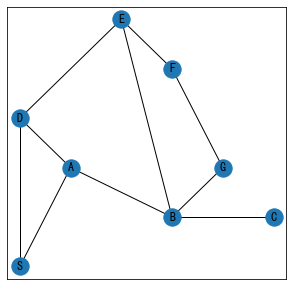

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import math
from queue import PriorityQueue

import networkx as nx

G=nx.Graph()

# add nodes with positions
G.add_node('S',pos=(0,0))
G.add_node('A',pos=(1,2))
G.add_node('B',pos=(3,1))
G.add_node('C',pos=(5,1))
G.add_node('D',pos=(0,3))
G.add_node('E',pos=(2,5))
G.add_node('F',pos=(3,4))
G.add_node('G',pos=(4,2))

# adding a list of edges:
G.add_edges_from([
    ('S','A'),('S','D'),
    ('A','D'),('A','B'),
    ('B','C'),('B','E'),('B','G'),
    ('D','E'),
    ('E','F'),
    ('F','G')
])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

plt.figure(figsize=(5,5))
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, pos);

## A* Algorithm
### Heuristics
1. Manhattan Distance  
It is nothing but the sum of absolute values of differences in the goal’s x and y coordinates and the current node’s x and y coordinates respectively, i.e.,\
$ h = abs (current\_node.x – goal.x) + 
     abs (current\_node.y – goal.y) $
1. Euclidean Distance  
As it is clear from its name, it is nothing but the distance between the current cell and the goal cell using the distance formula\
$ h = sqrt ( (current\_node.x – goal.x)^2 + (current\_node.y – goal.y)^2 ) $

In [5]:
print(pos)
for node in pos:
    print(node, pos[node])

{'S': (0, 0), 'A': (1, 2), 'B': (3, 1), 'C': (5, 1), 'D': (0, 3), 'E': (2, 5), 'F': (3, 4), 'G': (4, 2)}
S (0, 0)
A (1, 2)
B (3, 1)
C (5, 1)
D (0, 3)
E (2, 5)
F (3, 4)
G (4, 2)


In [6]:
# Heuristic 1: Manhattan Distance 
def heuristic1(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

# Heuristic 2: Euclidean Distance
def heuristic2(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return (math.sqrt((x1-x2)**2 + (y1-y2)**2))

### A* search

We use [`PriorityQueue`](https://docs.python.org/3/library/queue.html) to inplement `frontier`. Each element in the `PriorityQueue` is a score-object pair.

In [7]:
def a_star(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put((heuristic2(pos[start], pos[goal]), start))
    parent = {}
    cost_so_far = {}
    parent[start] = None
    cost_so_far[start] = 0
   
    # Execute until there are nodes to be visited
    while not frontier.empty():
        print('Frontier:', frontier.queue)
        # Extract a node from the frontier and expand the node
        current = frontier.get()[1] # [1] extracts the node
        print(current, " -> ")
        
        # Goal test
        if current == goal:
            break
        
        # Add to frontier
        for nextNode in graph.adj[current]:
            step_cost = heuristic2(pos[current], pos[nextNode])
            new_cost = cost_so_far[current] + step_cost
            # Update cost
            if (nextNode not in cost_so_far) or (new_cost < cost_so_far[nextNode]):
                cost_so_far[nextNode] = new_cost
                f_score = new_cost + heuristic1(pos[goal], pos[nextNode])
#                 f_score = new_cost + heuristic2(pos[goal], pos[nextNode])
                frontier.put((f_score, nextNode))
                parent[nextNode] = current
    
    return parent, cost_so_far

In [8]:
parent, cost_so_far = a_star(G, 'S', 'G')

Frontier: [(4.47213595499958, 'S')]
S  -> 
Frontier: [(5.23606797749979, 'A'), (8.0, 'D')]
A  -> 
Frontier: [(6.47213595499958, 'B'), (8.0, 'D')]
B  -> 
Frontier: [(5.8863495173726745, 'G'), (8.0, 'D'), (13.595241580617241, 'E'), (8.47213595499958, 'C')]
G  -> 


# Task
Plese finish the following tasks, and submit Jupyter notebook file **with output** to Moodle.\
Due date: 23:59, 23 Feb, 2021\
Late submission penalty: a reduction by 25% for each day.
## Task 1 (5 marks)
1. Define a `UniformCost` function, compute the path from start node to goal node using uniform cost search.
2. At the end of the search process, display the path from start node to goal node AND the total distance of this path .
3. Call the `UniformCost` function to find path from 'S' to 'G'.

#### Uniformcost 

In [9]:
def UniformCost(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put((0,start))
    parent = {}
    cost_so_far = {}
    parent[start] = None
    cost_so_far[start] = 0
    route = []

    # Execute until there are nodes to be visited
    while not frontier.empty():
        print('Frontier:', frontier.queue)
        # Extract a node from the frontier and expand the node
        current = frontier.get()[1] # [1] extracts the node
#         print(parent[current])
        print(current, " -> ") 

        # Goal test
        if current == goal:
            break
        
        # Add to frontier
        for nextNode in graph.adj[current]: 
            step_cost = heuristic2(pos[current], pos[nextNode])
            new_cost = cost_so_far[current] + step_cost
            # Update cost 
            if (nextNode not in cost_so_far) or (new_cost < cost_so_far[nextNode]):
                cost_so_far[nextNode] = new_cost
                f_score = new_cost
                frontier.put((f_score, nextNode))
                parent[nextNode] = current
                

    a = goal
    route.insert(0,a)
    while parent[a] != None:
        route.insert(0,parent[a])
        a = parent[a]

    print("The Path is:", '->'.join(route))
    

                
    print("Total distance is :" ,cost_so_far[goal])
    return parent, cost_so_far

In [10]:
parent,cost_so_far = UniformCost(G, 'S', 'G')

Frontier: [(0, 'S')]
S  -> 
Frontier: [(2.23606797749979, 'A'), (3.0, 'D')]
A  -> 
Frontier: [(3.0, 'D'), (4.47213595499958, 'B')]
D  -> 
Frontier: [(4.47213595499958, 'B'), (5.82842712474619, 'E')]
B  -> 
Frontier: [(5.82842712474619, 'E'), (6.47213595499958, 'C'), (5.8863495173726745, 'G')]
E  -> 
Frontier: [(5.8863495173726745, 'G'), (6.47213595499958, 'C'), (7.242640687119285, 'F')]
G  -> 
The Path is: S->A->B->G
Total distance is : 5.8863495173726745


## Task 2 (5 marks)
1. Define a `Greedy` function, compute the path from start node to goal node using greedy search. Using Euclidean Distance as heuristic.
2. At the end of the search process, display the path from start node to goal node AND the total distance of this path .
3. Call the `Greedy` function to find path from from 'S' to 'G'.

In [13]:
def Greedy(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put((heuristic2(pos[start], pos[goal]), start))
    parent = {}
    cost_so_far = {}
    parent[start] = None
    cost_so_far[start] = 0
    route = []
   
    # Execute until there are nodes to be visited
    while not frontier.empty():
        print('Frontier:', frontier.queue)
        # Extract a node from the frontier and expand the node
        current = frontier.get()[1] # [1] extracts the node
        print(current, " -> ")
        
        # Goal test
        if current == goal:
            break
        
        # Add to frontier
        for nextNode in graph.adj[current]:
            step_cost = heuristic2(pos[current], pos[nextNode])
            new_cost = cost_so_far[current] + step_cost
            # Update cost
            if (nextNode not in cost_so_far) or (new_cost < cost_so_far[nextNode]):
                cost_so_far[nextNode] = new_cost
                
                f_score = heuristic2(pos[goal], pos[nextNode])
                frontier.put((f_score, nextNode))
                parent[nextNode] = current
    
    a = goal
    route.insert(0,a)
    while parent[a] != None:
        route.insert(0,parent[a])
        a = parent[a]

    print("The Path is:", '->'.join(route))
    print("Total distance is :" ,cost_so_far[goal])
    
    return parent, cost_so_far

In [14]:
parent, cost_so_far = Greedy(G, 'S', 'G')

Frontier: [(4.47213595499958, 'S')]
S  -> 
Frontier: [(3.0, 'A'), (4.123105625617661, 'D')]
A  -> 
Frontier: [(1.4142135623730951, 'B'), (4.123105625617661, 'D')]
B  -> 
Frontier: [(0.0, 'G'), (1.4142135623730951, 'C'), (3.605551275463989, 'E'), (4.123105625617661, 'D')]
G  -> 
The Path is: S->A->B->G
Total distance is : 5.8863495173726745


- The codes in this notebook take insipiration from various sources. All codes are for educational purposes only and released under the CC1.0. 